In [2]:
import pandas as pd

# Ciclo 1

Ciclo simples, o objetivo foi criar uma baseline e ver como o modelo desempenharia \
com poucas colunas.

## Premissas:


* Trocando todos os valores de NA por null;
* Sem feature engineering;
* Sem Otimizacao.

## Desempenho:

Neste primeiro ciclo, o modelo de DecisionTree foi o que melhor uniu tempo de treino \
com desempenho.

In [3]:
c01 = pd.read_csv('../data/cross_performance_c00.csv', index_col=0)
c01

,Modelo,MAE,MAPE,RMSE,time
0,DecisionTreeRegressor,11123.910,0.3857,15360.100,0.80
1,RandomForestRegressor,11124.340,0.3857,15360.060,33.64
2,XGBRegressor,11148.600,0.3868,15382.060,15.74
3,LinearRegression,11970.390,0.4198,16153.800,0.44
4,Baseline,13402.185,0.4940,17641.151,0.00


# Ciclo 2 - Feature Engineering -> Title

## Premissas:
* A coluna title foi tokenizada. Após isso, a frequencia de cada string foi coletada;
* Calculei a correlação de cada palavra com a variável resposta - SalaryNormalized - \
através do método ponto bisserial. Essa formula calcula a correlação entre uma variável \
binaria e outra continua:
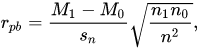
* Os valores demonstraram baixa correlação. Selecionei apenas os valores com correlação \
superior a 0.02
* **Modelos**:
    * Como a DecisionTreeRegressor vem performando muito bem, com um tempo de treino inferior,\
    optei por excluir os modelos de Bagging e Boosting, pois estavam demandando muito \
    processamento com baixo ganho de performance.

## Desempenho:
O Desempenho no ciclo 2 aumentou consideravelmente. Mas a complexidade do modelo também. \
No terceiro ciclo irei buscar novas features e tentar manter a complexidade baixa.

In [4]:
c02 = pd.read_csv('../data/cross_performance_c02.csv', index_col=0)
c02

,Modelo,MAE,MAPE,RMSE,time
0,DecisionTreeRegressor,7795.130,0.2466,12496.880,24.17
1,LinearRegression,8827.110,0.2952,12541.950,11.45
2,Baseline,13404.349,0.4940,17641.462,0.00


In [5]:
# Desempenho do modelo DecisionTreeRegressor no ciclo 1
desempenho_c01 = c01.loc[c01['Modelo'] == 'DecisionTreeRegressor', 'MAE'].values[0]

# Desempenho do modelo DecisionTreeRegressor no ciclo 2
desempenho_c02 = c02.loc[c02['Modelo'] == 'DecisionTreeRegressor', 'MAE'].values[0]

aumento_percentual = (desempenho_c01 - desempenho_c02) / desempenho_c01

In [6]:
print(f'O ciclo 2 teve uma redução de {round(aumento_percentual, 4) * 100}% \
no Erro Absoluto Médio em relação ao ciclo 1')

O ciclo 2 teve uma redução de 29.92% no Erro Absoluto Médio em relação ao ciclo 1


# Ciclo 3

## Premissas:

* Criação da classe para gerar as colunas dummies a partir de um texto;
* Adicionei a coluna describe e usei a classe para gerar seus dummies (o que piorou o modelo);
* Gerei uma Analise Exploratória de algumas colunas. Alguns insights interessantes foram gerados;
* Como o modelo estava pesando bastante pela alta dimensionalidade, gerei apenas as palavras
mais frequentes e com maior correlação.

## Desempenho:

Em desempenho, o Ciclo 3 fracassou: Muito pesado e ineficiente, além de aumentar o erro e gerar overfitting.
Entretanto, esse ciclo serviu para entender melhor os dados.

# Ciclo 4

## Premissa 1 - NA Values:

- Os valores Nulos das colunas ContractType e ContractTime estavam sendo associados a uma string   
indicando que eram valores nulos. Neste ciclo eu associei TODOS os valores nulos à classe com   
a distribuição mais próxima. Desta forma:


    * ContractType: Na values -> full_time
    * ContractTime: Na Values -> permanent
    
- Houve ganho de desempenho, mas mínimo, com essa atribuicao.

## Premissa 2 - Feature Engineering da coluna SourceName

- Criei colunas dummies para essa feature, usando os SourceName que mais conrrelacionavam   
com a variavel resposta.
- Entretanto, o desempenho abaixou bastante com essa feature:

In [11]:
pd.read_csv('../data/cross_performance_c04_sourcename.csv', index_col=0)

,Modelo,MAE,MAPE,RMSE,time
0,DecisionTreeRegressor,9391.950,0.3084,14507.990,24.45
1,LinearRegression,9778.500,0.3329,13741.010,10.86
2,Baseline,13405.117,0.4940,17640.966,0.00


- Dessa forma, essa feature foi retirada para a sequencia do ciclo

## Premissa 3 - Feature Engineering da coluna Company

* Sem correlação 

## Premissa 4 - Feature Engineering da coluna Location

* Criei dummies com as 5 cidades que mais correlacionam o salario
* Houve um ganho de desempenho

In [12]:
pd.read_csv('../data/cross_performance_c04_location.csv', index_col=0)

,Modelo,MAE,MAPE,RMSE,time
0,DecisionTreeRegressor,7661.340,0.2413,12406.350,22.54
1,LinearRegression,8590.240,0.2866,12250.840,11.55
2,Baseline,13404.349,0.4940,17641.462,0.00


# Ciclo 5